In [1]:
# Import Tensor-flow and import Keras  

import tensorflow as tf
import numpy as np
from tensorflow import keras
from ase.io import read
import matplotlib.pyplot as plt

In [2]:
# Load of dataset

ffile= "geo_all.xyz"
tensfile="NV.Dtens"

In [5]:
#Converting Input file (ffile) to a list of list

ftrs=read(ffile,':')
nf=len(ftrs)
#print(nf)
all_names = [ftrs[i].get_chemical_symbols() for i in range(nf)]
#print(all_names[0])
coords=np.array([ftrs[i].get_positions() for i in range(nf)])
#print(coords[0])
natom=[ftrs[i].get_number_of_atoms() for i in range(nf)]
#print(natom)
max_natom=max(natom)

#Converting Input file (gtensor) to a list of list
tens=np.genfromtxt(fname=tensfile, delimiter="")
#print(tens[1999])

################normalization of tensor###################

norm_tensor=[]
max_T=[]
min_T=[]
mean_T=[]
count=0
for m in range(9):
    max_T.append(np.max(tens[:,m]))
    min_T.append(np.min(tens[:,m]))
    mean_T.append(np.mean(tens[:,m]))    
    norm_tensor.append((tens[:,m]-mean_T[m])/(max_T[m]-min_T[m])) ## why ??

norm_tensor=np.array(norm_tensor)
#print(norm_tensor[0])
norm_tensor=np.transpose(norm_tensor)  ## why ??
#print(norm_tensor[0])

################################################
#normalization of coordination number

norm_coords=np.zeros((2000, 31, 3))
max_coords=np.zeros((31,3)) 
min_coords=np.zeros((31,3))
mean_coords=np.zeros((31,3)) 

for a in range(31):
    for j in range(3):
        max_coords[a,j]=np.max(coords[:,a,j])
        min_coords[a,j]=np.min(coords[:,a,j])
        mean_coords[a,j]=np.mean(coords[:,a,j])
        if max_coords[a,j] != min_coords[a,j] :
            norm_coords[:,a,j]=(coords[:,a,j]-mean_coords[a,j])/(max_coords[a,j]-min_coords[a,j])
        else:
            norm_coords[:,a,j]=coords[:,a,j]/max_coords[a,j]
        
#print(len(norm_coords))
print(norm_coords[0])

#for a in range(81):
#    for j in range(3):
#       print(a, j, max_coords[a,j], min_coords[a,j] )
#print(natom[0])

[[ 0.30870656  0.0061018  -0.29848274]
 [ 0.38697271 -0.21783617 -0.36534967]
 [-0.19056256 -0.1816911  -0.03493847]
 [ 0.28035972  0.07188169 -0.13913182]
 [-0.34377814 -0.13944692 -0.34058179]
 [-0.44863882  0.38333358  0.17973473]
 [-0.36585478 -0.42982481  0.38291813]
 [-0.21106212  0.49351827  0.1809517 ]
 [-0.18106203  0.03199174 -0.06113846]
 [ 0.29544269 -0.25457479 -0.26915623]
 [ 0.47378228  0.36152776  0.24049424]
 [-0.06982874  0.1553531   0.30512306]
 [-0.23082231 -0.44795048  0.06283375]
 [-0.18822097  0.44237231  0.07089565]
 [-0.15993672  0.24816908  0.50085918]
 [ 0.27930255 -0.41305328 -0.38551651]
 [ 0.43567609 -0.21284767  0.24746448]
 [-0.03871461  0.05453327  0.3229995 ]
 [-0.4967674   0.30624599  0.33112781]
 [ 0.19913257 -0.50178478 -0.15383835]
 [-0.06065566 -0.43773137  0.09820871]
 [-0.1134183   0.23957039  0.290993  ]
 [-0.47636236 -0.23392593 -0.40587594]
 [ 0.44657911 -0.47739845  0.08900075]
 [ 0.48806059 -0.24431998 -0.01588858]
 [-0.43246873 -0.41469545

In [6]:
#Random shuffel of the data
tr_nf=1800
##te_nf=200
va_nf=200

inputs=[]
tens_out=[]
utens_out=[]

va_inputs=[]
va_tens_out=[]
va_utens_out=[]

##te_inputs=[]
##te_tens_out=[]
##te_utens_out=[]


################ Random Shuffel Training set data########################
for repeat in range(11):
    idx=np.arange(nf)
    np.random.shuffle(idx)
    
    inp=[]
    for i in range(tr_nf):
        j=idx[i]
        inp.append(norm_coords[j,:,:])
    inputs.append(np.array(inp))

    tensor=[]
    for i in range(tr_nf):
        j=idx[i]
        tensor.append(norm_tensor[j,:])
    tens_out.append(np.array(tensor))

############## Un-normalized tensor #######
    utensor=[]
    for i in range(tr_nf):
        j=idx[i]
        utensor.append(tens[j,:])
    utens_out.append(np.array(utensor))
#########################################################################

################# Random Shuffel Validation set data ####################
    val_inp=[]
    for i in range(tr_nf,tr_nf+va_nf):
        j=idx[i]
        val_inp.append(norm_coords[j,:,:])
    va_inputs.append(np.array(val_inp))

    val_tens_out=[]
    for i in range(tr_nf,tr_nf+va_nf):
        j=idx[i]
        val_tens_out.append(norm_tensor[j,:])
    va_tens_out.append(np.array(val_tens_out))

####### Un-normalized Tensor ###########
    val_utens_out=[]
    for i in range(tr_nf,tr_nf+va_nf):
        j=idx[i]
        val_utens_out.append(tens[j,:])
    va_utens_out.append(np.array(val_utens_out))
#######################################################################

##################### Test test #######################################
#    te_inp=[]
#    for i in range(tr_nf+va_nf,nf):
#        j=idx[i]
#        te_inp.append(norm_coords[j,:,:])
#    te_inputs.append(np.array(te_inp))
#
#    te_tensor=[]
#    for i in range(tr_nf+va_nf,nf):
#        j=idx[i]
#        te_tensor.append(norm_tensor[j,:])
#    te_tens_out.append(np.array(te_tensor))
#    
#    te_utensor=[]
#    for i in range(tr_nf+va_nf,nf):
#        j=idx[i]
#        te_utensor.append(tens[j,:])
#    te_utens_out.append(np.array(te_utensor))
#######################################################################    

#print(len(idx))

#print(len(inputs))
#print(len(tens_out[0]))
#print()
#print(inputs[1][0])

In [7]:
# Loss and optimizer which require for the training of the model 

loss= keras.losses.MSE
optim= keras.optimizers.Adam(lr=0.001)

#This is optional
metrics= ["accuracy"]

/home/smondal/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
reg=1e-6
ker_reg=keras.regularizers.l2(reg)
bias_reg=keras.regularizers.l2(reg)

input_layer=keras.layers.Input(shape=(31,3))
layer1=keras.layers.Flatten()(input_layer)
layer2=keras.layers.Dense(units=128, activation='sigmoid',kernel_regularizer=ker_reg, bias_regularizer=bias_reg)(layer1)
layer3=keras.layers.Dense(units=64, activation='sigmoid',kernel_regularizer=ker_reg, bias_regularizer=bias_reg)(layer2)
layer4=keras.layers.Dense(units=16, activation='sigmoid',kernel_regularizer=ker_reg, bias_regularizer=bias_reg)(layer3)
oup=keras.layers.Dense(units=9)(layer4)
    
model_3h=keras.models.Model(input_layer,oup)

INFO:tensorflow:Assets written to: model_1/assets
7/7 [==============================] - 0s 604us/step
RMSE = 0.00014785585030402035


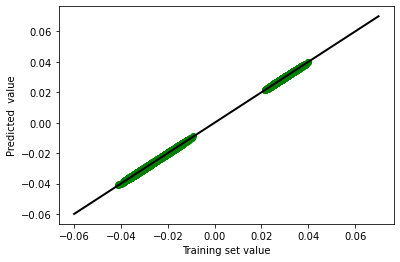

RMSE = 0.000186607323902646


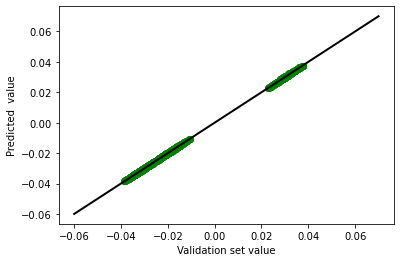

INFO:tensorflow:Assets written to: model_2/assets
7/7 [==============================] - 0s 653us/step
RMSE = 0.00017447068829810455


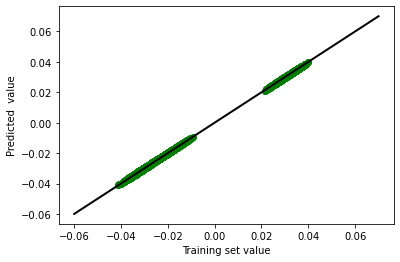

RMSE = 0.000197616518443564


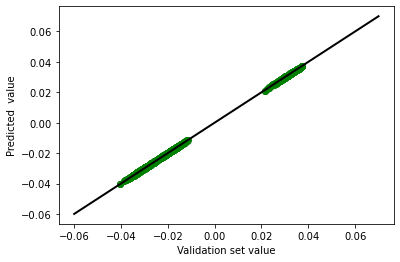

INFO:tensorflow:Assets written to: model_3/assets
7/7 [==============================] - 0s 752us/step
RMSE = 0.00015977636372855854


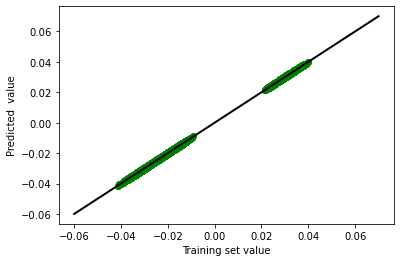

RMSE = 0.00019789159001159541


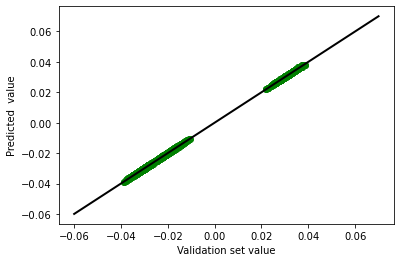

INFO:tensorflow:Assets written to: model_4/assets
7/7 [==============================] - 0s 644us/step
RMSE = 0.00016271334059565022


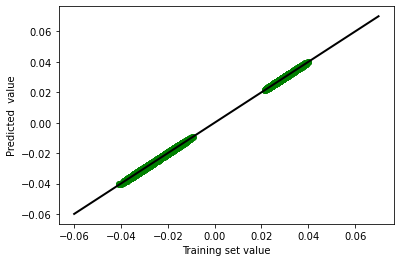

RMSE = 0.00020036314387916212


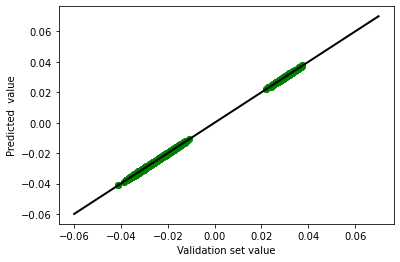

INFO:tensorflow:Assets written to: model_5/assets
7/7 [==============================] - 0s 645us/step
RMSE = 0.0001291007643346253


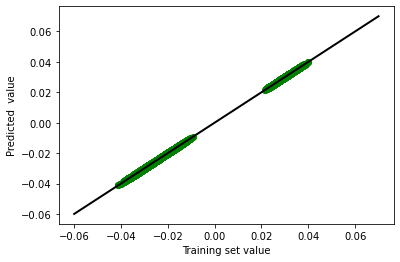

RMSE = 0.00017479258654780864


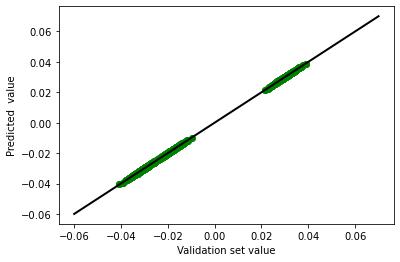

INFO:tensorflow:Assets written to: model_6/assets
7/7 [==============================] - 0s 609us/step
RMSE = 0.0001320183507765695


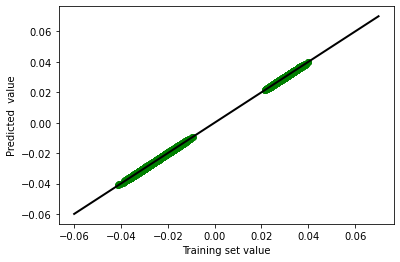

RMSE = 0.00016874988418064175


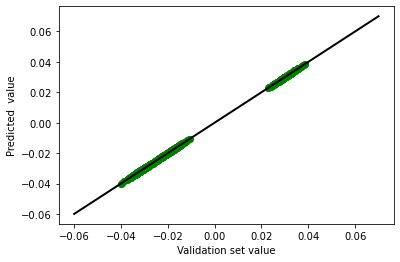

INFO:tensorflow:Assets written to: model_7/assets
7/7 [==============================] - 0s 592us/step
RMSE = 0.0001469303805469797


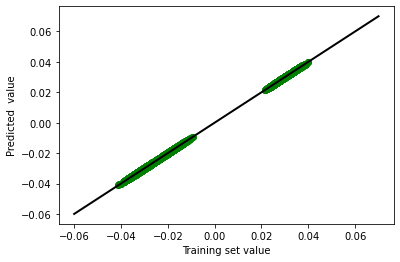

RMSE = 0.00017911268974301028


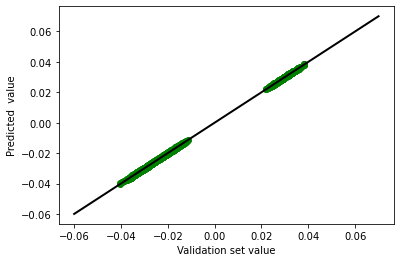

INFO:tensorflow:Assets written to: model_8/assets
7/7 [==============================] - 0s 617us/step
RMSE = 0.00013407421741646106


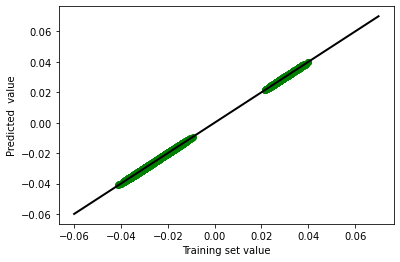

RMSE = 0.00017745040656674287


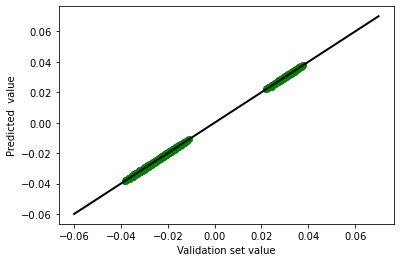

INFO:tensorflow:Assets written to: model_9/assets
7/7 [==============================] - 0s 619us/step
RMSE = 0.0001317341195065278


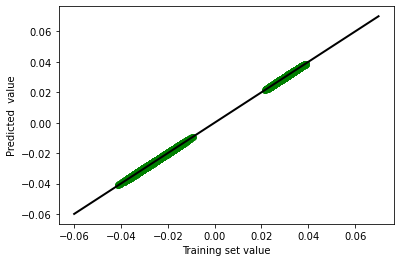

RMSE = 0.00017491708979120875


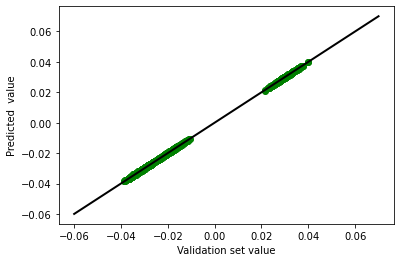

INFO:tensorflow:Assets written to: model_10/assets
7/7 [==============================] - 0s 693us/step
RMSE = 0.0001340082108461651


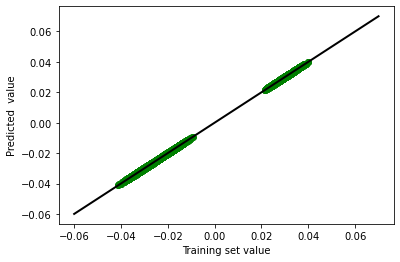

RMSE = 0.00016272721489587374


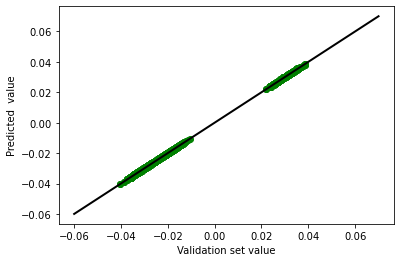

In [11]:
model_3h.compile(loss=loss, optimizer=optim, metrics=metrics)



for repeat in range(10):
    keras.backend.clear_session()
    del model_3h
    model_3h=keras.models.Model(input_layer,oup)
    model_3h.compile(loss=loss, optimizer=optim, metrics=metrics)
    
    h=model_3h.fit(inputs[repeat+1], tens_out[repeat+1], validation_data=(va_inputs[repeat+1],va_tens_out[repeat+1]), batch_size=100, epochs=1500, verbose=0)
    model_3h.save("model_{}".format(repeat+1))
    
    
    train_predict_3h=model_3h.predict(inputs[repeat+1])
    val_predict_3h=model_3h.predict(va_inputs[repeat+1])
    

    val_predict_non_norm=np.zeros((val_predict_3h.shape))
    

    train_predict_non_norm=np.zeros((train_predict_3h.shape))


    for m in range(9): 

        val_predict_non_norm[:,m]=val_predict_3h[:,m]*(max_T[m]-min_T[m])+mean_T[m] 
 
        train_predict_non_norm[:,m]=train_predict_3h[:,m]*(max_T[m]-min_T[m])+mean_T[m] 
        
    zero_x=[-0.06,0.00,0.07]
    zero_y=[-0.06,0.00,0.07]

#    plt.figure(0)
    plt.xlabel("Training set value")
    plt.ylabel("Predicted  value")
    plt.plot(zero_x,zero_y, linewidth=2.0,color='black')
    plt.scatter(utens_out[repeat+1], train_predict_non_norm, color='green')
    #plt.xlim(1.976,1.989)
    #plt.ylim(1.976,1.989)
    #plt.scatter(val_out_non_norm, val_predict_non_norm, color='green')
    #t1=np.mean(np.absolute(train_predict_non_norm-train_out_non_norm))
    t2=np.sqrt(((train_predict_non_norm-utens_out[repeat+1]) ** 2).mean())
    print('RMSE =', t2)
    plt.savefig('/home/smondal/projects/defects/NV-diamond/ML_model/plot/Model_Tr_set_{}.png'.format(repeat+1),dpi=1200,bbox_inches='tight')
    plt.show()  
       
    
    
    zero_x=[-0.06,0.00,0.07]
    zero_y=[-0.06,0.00,0.07]

#    plt.figure(1)
    plt.xlabel("Validation set value")
    plt.ylabel("Predicted  value")
    plt.plot(zero_x,zero_y, linewidth=2.0,color='black')
    #plt.scatter(train_out_non_norm[:,0], train_predict_non_norm[:,0], color='green')
    plt.scatter(va_utens_out[repeat+1], val_predict_non_norm, color='green')
    #plt.xlim(1.976,1.989)
    #plt.ylim(1.976,1.989)
    #plt.scatter(val_out_non_norm, val_predict_non_norm, color='green')
    #t1=np.mean(np.absolute(train_predict_non_norm-train_out_non_norm))
    t2=np.sqrt(((val_predict_non_norm-va_utens_out[repeat+1]) ** 2).mean())
    print('RMSE =', t2)
    plt.savefig('/home/smondal/projects/defects/NV-diamond/ML_model/plot/Model_va_set_{}.png'.format(repeat+1),dpi=1200,bbox_inches='tight')
    plt.show() 

In [12]:
#Generating second order displacements

#Redefining number of atoms in optmized geo which willl be distorted
natom[0]=31

#displacement along X and Y
disp1=[-0.06,-0.04,-0.02,0.02,0.04,0.06]
disp2=[-0.06,-0.04,-0.02,0.02,0.04,0.06]

#Read the OPT geo
opt_coords=np.genfromtxt("/home/smondal/projects/defects/NV-diamond/ML_model/inp_file_gen_for_pred/output_5A-without_H_peripheral_C.xyz",delimiter="",skip_header=2, usecols=range(1,4))
#print(opt_coords)

disp_coords=np.zeros((natom[0],natom[0],3,3,len(disp1),len(disp2),natom[0],3))
norm_disp_coords=np.zeros((disp_coords.shape))
norm_opt_coords=np.zeros((opt_coords.shape))

#Normaliztion of OPT coord
for a in range(natom[0]):
    for j in range(3):
        norm_opt_coords[a,j]=(opt_coords[a,j]-mean_coords[a,j])/(max_coords[a,j]-min_coords[a,j])

for a1 in range(natom[0]):
    for ax1 in range(3):
        for a2 in range(a1,natom[0]):
            for ax2 in range(3):
                for d1 in range(len(disp1)):
                    for d2 in range(len(disp2)):

                        for atom in range(natom[0]):
                            for axis in range(3):

                                if atom==a1 and axis==ax1:
                                    disp_coords[a1,a2,ax1,ax2,d1,d2,atom,axis]=opt_coords[a1,ax1]+disp1[d1]
                                elif atom==a2 and axis==ax2:
                                    disp_coords[a1,a2,ax1,ax2,d1,d2,atom,axis]=opt_coords[a2,ax2]+disp2[d2]
                                else:
                                    disp_coords[a1,a2,ax1,ax2,d1,d2,atom,axis]=opt_coords[atom,axis]                                
                                    
                    for a in range(natom[0]):
                        for j in range(3):
                            norm_disp_coords[a1,a2,ax1,ax2,d1,:,a,j]=(disp_coords[a1,a2,ax1,ax2,d1,:,a,j]-mean_coords[a,j])/(max_coords[a,j]-min_coords[a,j])

norm_disp_coords2=np.reshape(norm_disp_coords, (natom[0],natom[0]*3*3*len(disp1)*len(disp2),natom[0],3))

In [13]:
opt_norm_predict=np.zeros((10,9))
opt_predict=np.zeros((10,9))
disp_norm_predict2=np.zeros((10,natom[0],natom[0]*3*3*len(disp1)*len(disp2),9))
disp_predict2=np.zeros((disp_norm_predict2.shape))

for repeat in range(10):
    model=keras.models.load_model("model_{}".format(repeat+1))    
    opt_norm_predict[repeat,:]=model_3h.predict(np.array([norm_opt_coords,]))[0]
    for m in range(9):
        opt_predict[repeat,m]=(opt_norm_predict[repeat,m]*(max_T[m]-min_T[m])+mean_T[m])

    for a1 in range(natom[0]):
        disp_norm_predict2[repeat,a1,:,:]=model_3h.predict(norm_disp_coords2[a1,:,:,:])

        for m in range(9):
            disp_predict2[repeat,a1,:,m]=(disp_norm_predict2[repeat,a1,:,m]*(max_T[m]-min_T[m])+mean_T[m])

disp_predict=np.reshape(disp_predict2, (10,natom[0],natom[0],3,3,len(disp1),len(disp2),9))

disp_predict_rescale=np.zeros((disp_predict.shape))
for a1 in range(natom[0]):
    for ax1 in range(3):
        for a2 in range(a1,natom[0]):
            for ax2 in range(3):
                for d1 in range(len(disp1)):
                    for d2 in range(len(disp2)):
                        for re in range(10):
                            disp_predict_rescale[re,a1,a2,ax1,ax2,d1,d2,:]=disp_predict[re,a1,a2,ax1,ax2,d1,d2,:]-opt_predict[re,:]

disp_avg_predict=np.zeros((natom[0],natom[0],3,3,len(disp1),len(disp2),9))
disp_std_predict=np.zeros((natom[0],natom[0],3,3,len(disp1),len(disp2),9))
for a1 in range(natom[0]):
    for ax1 in range(3):
        for a2 in range(a1,natom[0]):
            for ax2 in range(3):
                for d1 in range(len(disp1)):
                    for d2 in range(len(disp2)):
                        for m in range(9):
                            disp_avg_predict[a1,a2,ax1,ax2,d1,d2,m]=np.mean(disp_predict_rescale[:,a1,a2,ax1,ax2,d1,d2,m])
                            disp_std_predict[a1,a2,ax1,ax2,d1,d2,m]=np.std(disp_predict_rescale[:,a1,a2,ax1,ax2,d1,d2,m])

314/314 [==============================] - 0s 421us/step


314/314 [==============================] - 0s 435us/step


314/314 [==============================] - 0s 425us/step


In [14]:
X,Y=np.meshgrid(disp1,disp2)
X=X.flatten()
Y=Y.flatten()
axis=["x","y","z"]
coeff=np.zeros((natom[0],natom[0],3,3,9,6))
self_coeff=np.zeros((natom[0],3,9,3))
se=np.zeros((natom[0],natom[0],3,3,9,6))
self_se=np.zeros((natom[0],3,9,3))
tot_count=0
tot_dof=3*natom[0]
dof=[]
dof1=np.zeros((natom[0],3))
dof2=np.zeros((natom[0],3,natom[0],3))
count1=0
for a1 in range(natom[0]):
    for ax1 in range(3):
        degree=[]
        count2=count1
        count1+=1

        for a2 in range(a1,natom[0]):
            if a2==a1:
                for ax2 in range(ax1,3):

                    count2+=1
                    if count1<=tot_dof and count2<=tot_dof:
                        tot_count+=1
                        dof1[a1,ax1]=count1
                        dof2[a1,ax1,a2,ax2]=count2
                        degree.append([count1,count2])

            else:
                for ax2 in range(3):
                    count2+=1
                    if count1<=tot_dof and count2<=tot_dof:
                         tot_count+=1
                         dof1[a1,ax1]=count1
                         dof2[a1,ax1,a2,ax2]=count2
                         degree.append([count1,count2])

        dof.append(degree)
        
for a1 in range(natom[0]):
    for ax1 in range(3):
        for a2 in range(a1,natom[0]):
            for ax2 in range(3):
                if a2==a1 and ax2==ax1:
                    for m in range(9):
                        A=np.array([np.array(disp1)*0+1, np.array(disp1), 0.5*np.array(disp1)**2]).T
                        B=disp_avg_predict[a1,a2,ax1,ax2,:,0,m].flatten()
                        self_coeff[a2,ax2,m,:], r, rank, s = np.linalg.lstsq(A,B)
                        for i in range(1,3):
                            self_se[a2,ax2,m,i]=np.sqrt(((1/(6-2))*r)/(np.sum((A[:,i]-np.mean(A[:,i]))**2)))[0]

                            if self_se[a2,ax2,m, i] > (0.2*self_coeff[a2,ax2,m,i]):
                                self_coeff[a2,ax2,m,i] = 0.0

                else:
                    for m in range(9):
                        A=np.array([X*0+1, X, Y, 0.5*X**2,0.5*Y**2, X*Y]).T
                        B=disp_avg_predict[a1,a2,ax1,ax2,:,:,m].flatten()
                        coeff[a1,a2,ax1,ax2,m,:], r, rank, s = np.linalg.lstsq(A,B)

                        for i in range(1,6):
                            se[a1,a2,ax1,ax2,m,i]=np.sqrt(((1/(36-2))*r)/(np.sum((A[:,i]-np.mean(A[:,i]))**2)))[0]

                            if se[a1,a2,ax1,ax2,m, i] > (0.2*coeff[a1,a2,ax1,ax2,m,i]):
                                coeff[a1,a2,ax1,ax2,m,i] = 0.0

f=open("ddD.dat","w")
f.write("{}\n".format(int(tot_count)))
for a1 in range(natom[0]):
    for ax1 in range(3):
        for a2 in range(a1,natom[0]):
            if a2==a1:
                for ax2 in range(ax1,3):
                    f.write("\t{} {} \t {} {}\n".format(int(dof1[a1,ax1]),1,int(dof2[a1,ax1,a2,ax2]),1))
                    count=0
                    for i in range(3):
                        for j in range(3):
                            if ax2==ax1:
                                f.write("{:.15E}\t".format(self_coeff[a2,ax2,count,2]))
                            else:
                                f.write("{:.15E}\t".format(coeff[a1,a2,ax1,ax2,count,5]))
                            count+=1
                        f.write("\n")
            else:
                for ax2 in range(3):
                    f.write("\t{} {} \t {} {}\n".format(int(dof1[a1,ax1]),1,int(dof2[a1,ax1,a2,ax2]),1))
                    count=0
                    for i in range(3):
                        for j in range(3):
                            f.write("{:.15E}\t".format(coeff[a1,a2,ax1,ax2,count,5]))
                            count+=1
                        f.write("\n")
f.close()

f=open("dD.dat","w")
f.write("{}\n".format(int(tot_dof)))
tot_count=0
for a in range(natom[0]):
    for ax in range(3):
        tot_count+=1
        f.write("\t{} {} \n".format(int(tot_count),1))
        count=0
        for i in range(3):
            for j in range(3):
                f.write("{:.15E}\t".format(self_coeff[a,ax,count,1]))
                count+=1
            f.write("\n")

f.close()


<ipython-input-14-a1bd5f01cc38>:51: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self_coeff[a2,ax2,m,:], r, rank, s = np.linalg.lstsq(A,B)
<ipython-input-14-a1bd5f01cc38>:62: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff[a1,a2,ax1,ax2,m,:], r, rank, s = np.linalg.lstsq(A,B)
